Final code!

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import *
import numpy as np

In [3]:
df = pd.read_csv('fashion-mnist_test.csv')

In [4]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
# X_test = df.iloc[:, 1:].values
# Y_test = df.iloc[:, 0].values
# We do this if a CSV file is given, same for train data

In [34]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()

In [35]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

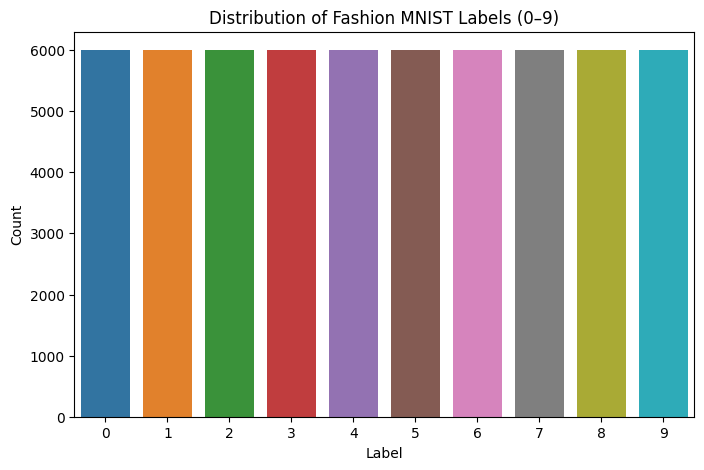

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title("Distribution of Fashion MNIST Labels (0–9)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [37]:
"""the above graph is just to show that the dataset is balanced
we can remember and label the classes or keep it as 0-9 itself"""

'the above graph is just to show that the dataset is balanced\nwe can remember and label the classes or keep it as 0-9 itself'

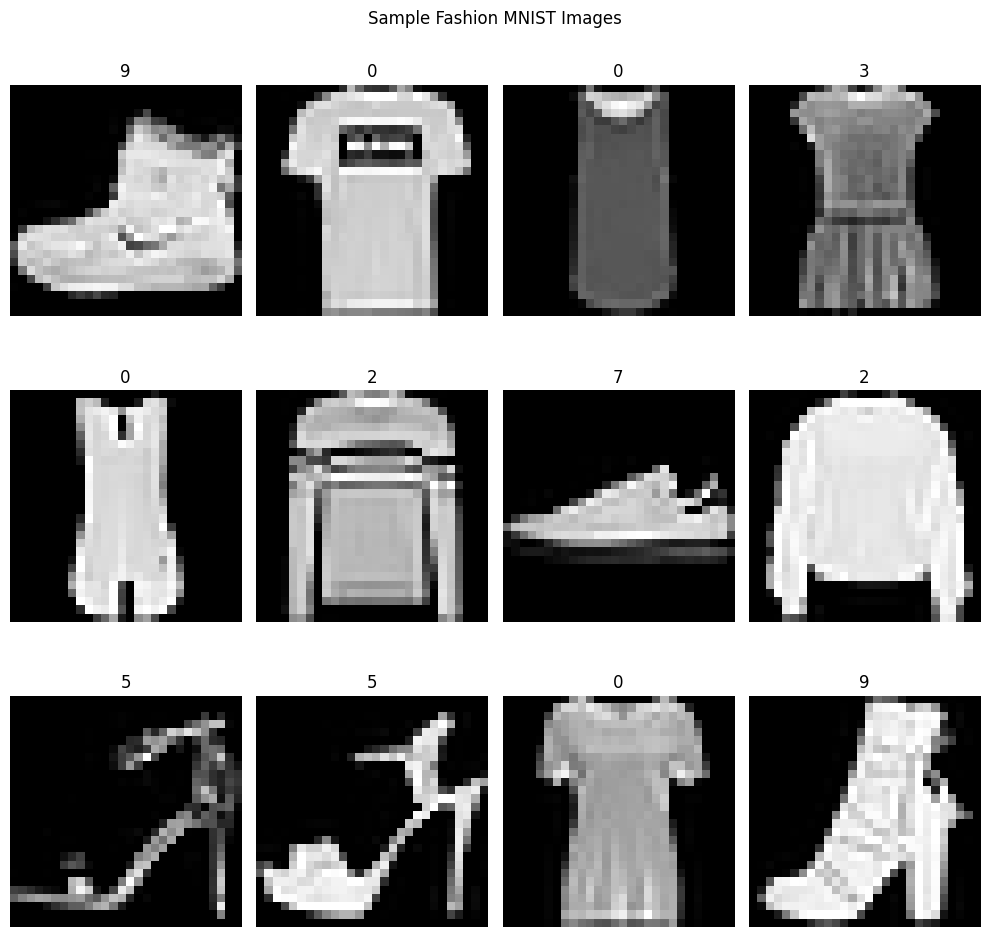

In [38]:
"""We can plot this and figure out the class labels 
eg: 9- ankle boot
0-tshirt/top
3-dress
2-pullover
7-sneaker
5-sandal
"""
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images")
plt.tight_layout()
plt.show()

In [39]:
# Normalize the pixel values to 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [40]:
# Reshape to add channel dimension (28*28*1) 
#channel is basically RGB, Grayscale,etc
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [47]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) 
#output layer no of classes =10 so neurons are 10

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5629 - accuracy: 0.7946 - val_loss: 0.3990 - val_accuracy: 0.8460
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3807 - accuracy: 0.8622 - val_loss: 0.3377 - val_accuracy: 0.8758
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3296 - accuracy: 0.8793 - val_loss: 0.3031 - val_accuracy: 0.8900
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3016 - accuracy: 0.8882 - val_loss: 0.2937 - val_accuracy: 0.8918
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2821 - accuracy: 0.8961 - val_loss: 0.2865 - val_accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2658 - accuracy: 0.9011 - val_loss: 0.2678 - val_accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2542 - accuracy: 0.9057 - val_loss: 0.2585 -

In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2604 - accuracy: 0.9048

 Test Accuracy: 90.48%


In [54]:
print(f"\n Test Loss:{test_loss:.2f}")


 Test Loss:0.26


9


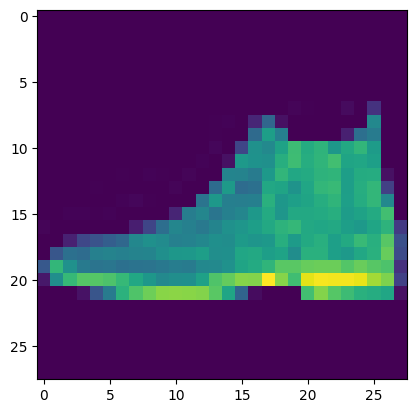

In [60]:
predictions = model.predict(X_test[0:1])
label = np.argmax(predictions)
print(label)
plt.imshow(X_test[0:1][0])

2


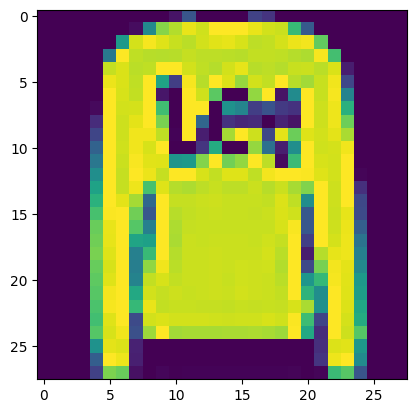

In [61]:
predictions = model.predict(X_test[1:2])
label = np.argmax(predictions)
print(label)
plt.imshow(X_test[1:2][0])

In [ ]:
"""X_test[1:2] returns a batch of one image 
X_test[1:2]- A slice from index 1 up to (but not including) 2.
basically batch shape is (N,28,28,1) like there are N images but here N is 1
and so choosing the 1st image becomes X_test[1:1][0]
we cannot directly access the image as X_test[1]
You can access any particular image as X[1:2], X[0:1] ,etc"""